In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
plt.rcParams['figure.figsize'] = [12, 8]

# Data Set information

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

## Attributes
1. Age - Age of the patient
2. Gender - Gender of the patient
3. TB - Total Bilirubin
4. DB - Direct Bilirubin
5. Alkphos - Alkaline Phosphotase
6. Sgpt - Alamine Aminotransferase
7. Sgot - Aspartate Aminotransferase
8. TP - Total Protiens
9. ALB - Albumin
10. A/G Ratio - Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts)

# Read the data

In [2]:
# dataset location
dataset_location = "./dataset/ilpd_dataset.csv"

# column names
names = ['Age', 'Gender', 'TB', 'DB', 'ALKPHOS', 'SGPT', 'SGOT', 'TP', 'ALB', 'AG Ratio', 'selector']

# read dataset to pandas dataframe
df = pd.read_csv(dataset_location, names=names);

# show first five cols of the dataset
print("Data shape: ", df.shape)
df.head()

Data shape:  (583, 11)


,Age,Gender,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       583 non-null    int64  
 1   Gender    583 non-null    object 
 2   TB        583 non-null    float64
 3   DB        583 non-null    float64
 4   ALKPHOS   583 non-null    int64  
 5   SGPT      583 non-null    int64  
 6   SGOT      583 non-null    int64  
 7   TP        583 non-null    float64
 8   ALB       583 non-null    float64
 9   AG Ratio  579 non-null    float64
 10  selector  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
df.describe()

,Age,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a11456450>,
      dtype=object)

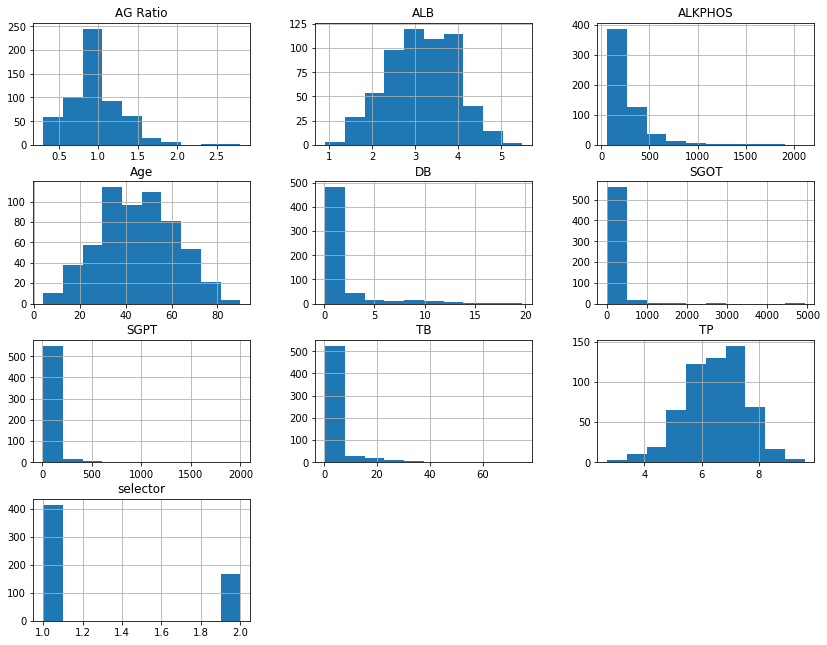

In [8]:
df.hist(figsize=(14,11))

# Preprocessing

## change non-numerical values to integers

In [9]:
# check unique values
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [183]:
# change unique category names to integers
gender_dict = {"Female": 0, "Male": 1}
df['Gender'] = df['Gender'].map(gender_dict)

df.head()

,Age,Gender,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,selector
151,50,NaN,1.6,0.8,218,18,20,5.9,2.9,0.96,1
65,57,NaN,1.4,0.7,470,62,88,5.6,2.5,0.80,1
223,50,NaN,1.1,0.3,175,20,19,7.1,4.5,1.70,2
325,42,NaN,0.8,0.2,158,27,23,6.7,3.1,0.80,2
172,55,NaN,14.1,7.6,750,35,63,5.0,1.6,0.47,1


## split data into training & testing set

In [184]:
# shuffle data
df = shuffle(df)

# replace nan values with 0
df = pd.DataFrame(df).fillna(0)

# split data into feture set X and labels y
X = df.drop('selector', axis=1)
y = df['selector']

# show first five cols of feature set
X.head()

,Age,Gender,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio
482,45,0.0,1.1,0.4,92,91,188,7.2,3.8,1.11
148,50,0.0,0.9,0.2,202,20,26,7.2,4.5,1.66
70,19,0.0,0.7,0.2,186,166,397,5.5,3.0,1.20
86,13,0.0,0.6,0.1,320,28,56,7.2,3.6,1.00
362,55,0.0,1.1,0.3,215,21,15,6.2,2.9,0.80


In [185]:
# show unique labels
y.unique()

array([1, 2])

In [186]:
# set number of test samples
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

In [187]:
print("Number of test samples: ", X_test.shape[0])

Number of test samples:  117


## feature selection

In [188]:
X.head()

,Age,Gender,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio
482,45,0.0,1.1,0.4,92,91,188,7.2,3.8,1.11
148,50,0.0,0.9,0.2,202,20,26,7.2,4.5,1.66
70,19,0.0,0.7,0.2,186,166,397,5.5,3.0,1.20
86,13,0.0,0.6,0.1,320,28,56,7.2,3.6,1.00
362,55,0.0,1.1,0.3,215,21,15,6.2,2.9,0.80


In [189]:
#X = X.drop(columns=['tp'])
#X.head()

# Select K features
#X_new=SelectKBest(score_func=chi2,k=4).fit_transform(X,y)

#print(X_new[:5])

X = X[['SGOT']]
X.head()

,SGOT
482,188
148,26
70,397
86,56
362,15


In [190]:
# set number of test samples
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = test_size)

## feature scaling

In [191]:
scaler = StandardScaler()

# fit only for training data
scaler.fit(X_train)

# transform training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and predictions

In [192]:
# create 2 layers of 20 nodes each + 2000 iterations
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(50, 50, 50), max_iter=2000, activation='tanh', learning_rate_init=0.02)

# train algorithm on training data
mlp.fit(X_train, y_train.values.ravel())

# make predictions
predictions = mlp.predict(X_test)

# accuracy score
acc = accuracy_score(y_test, predictions)

# Check the results

In [193]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print("Accuracy Using MLP: " + str(acc)+'\n')

[[79  5]
 [30  3]]
              precision    recall  f1-score   support

           1       0.72      0.94      0.82        84
           2       0.38      0.09      0.15        33

    accuracy                           0.70       117
   macro avg       0.55      0.52      0.48       117
weighted avg       0.63      0.70      0.63       117

Accuracy Using MLP: 0.7008547008547008

